# Encrypt and decrypt the text

In [9]:
import encrypt
import decrypt
import re
with open('./data/krakatit.txt', 'r', encoding='utf-8') as file:
    text = file.read()
    text = text.replace(' ', '_').replace('\n', '_').upper()  # Replace spaces and newlines with underscores
text = re.sub(r'[^A-ZÁČĎÉĚÍŇÓŘŠŤÚŮÝŽ_]', '', text)  # Allow underscores

key = "QWERTYUIOPASD_FGHJKLZXCVBNM"
# Show a sample of the text and its encryption
sample = text[:500]  # Take first x characters as a sample
print('Original text:', sample)
encrypted = encrypt.encrypt(sample, key)
# Show the encrypted text
print('Encrypted text:', encrypted)
# Decrypt the encrypted text
decrypted = decrypt.decrypt(encrypted, key)
print('Decrypted text:', decrypted)

Original text: KAREL_ČAPEK_KRAKATIT__I_S_VEČEREM_ZHOUSTLA_MLHA_SYCHRAVÉHO_DNE_JE_TI_JAKO_BY_SES_PROTLAČOVAL_ŘÍDKOU_VLHKOU_HMOTOU_JEŽ_SE_ZA_TEBOU_NEODVRATNĚ_ZAVÍRÁ_CHTĚL_BYS_BÝT_DOMA_DOMA_U_SVÉ_LAMPY_V_KRABICI_ČTYŘ_STĚN_NIKDY_SES_NECÍTIL_TAK_OPUŠTĚN_PROKOP_SI_RAZÍ_CESTU_PO_NÁBŘEŽÍ_MRAZÍ_HO_A_ČELO_MÁ_ZVLHLÉ_POTEM_SLABOSTI_CHTĚL_BY_SI_SEDNOUT_TADY_NA_TÉ_MOKRÉ_LAVIČCE_ALE_BOJÍ_SE_STRÁŽNÍKŮ_ZDÁ_SE_MU_ŽE_SE_MOTÁ_ANO_U_STAROMĚSTSKÝCH_MLÝNŮ_SE_MU_NĚKDO_VYHNUL_OBLOUKEM_JAKO_OPILÉMU_NYNÍ_TEDY_VYNAKLÁDÁ_VEŠKERU_SÍLU_ABY_
Encrypted text: AQJTSMČQGTAMAJQAQLOLMMOMKMXTČTJTDMNIFZKLSQMDSIQMKBEIJQXÉIFMR_TMPTMLOMPQAFMWBMKTKMGJFLSQČFXQSMŘÍRAFZMXSIAFZMIDFLFZMPTŽMKTMNQMLTWFZM_TFRXJQL_ĚMNQXÍJÁMEILĚSMWBKMWÝLMRFDQMRFDQMZMKXÉMSQDGBMXMAJQWOEOMČLBŘMKLĚ_M_OARBMKTKM_TEÍLOSMLQAMFGZŠLĚ_MGJFAFGMKOMJQNÍMETKLZMGFM_ÁWŘTŽÍMDJQNÍMIFMQMČTSFMDÁMNXSISÉMGFLTDMKSQWFKLOMEILĚSMWBMKOMKTR_FZLMLQRBM_QMLÉMDFAJÉMSQXOČETMQSTMWFPÍMKTMKLJÁŽ_ÍAŮMNRÁMKTMDZMŽTMKTMDFLÁMQ_FMZMKLQJFDĚKLKAÝEIMDSÝ_ŮMKTMDZM_ĚARFMXBI_ZSMFWSFZATDMPQAFMFGOSÉDZM_B_ÍM

# Generate the bigram matrix

In [10]:
import bigram

# Break the encryption using M-H algorithm

### Improve the decryption using smart key

In [11]:
from smart_keygen import generate_initial_key

# Generate smarter initial key from frequency analysis
initial_key = generate_initial_key(encrypted)
print("Smart initial key:", initial_key)

Smart initial key: _MCVJAZFDUSIEYBHOPRNGQČKWLT


In [12]:
import metropolis
import pandas as pd
from decrypt import decrypt

# Load reference bigram matrix (must be created via bigram.py first!)
reference_matrix = pd.read_csv('relativni_bigramova_matice.csv', index_col=0).values

# Run Metropolis-Hastings on the encrypted sample
best_key, score_history = metropolis.metropolis_hastings(
    ciphertext=encrypted,
    reference_matrix=reference_matrix,
    iterations=10000,
    initial_key=initial_key
)

# Show results
print("Most likely key found:", best_key)
print("Decrypted text using this key:")
print(decrypt(encrypted, best_key))

Most likely key found: LEBOAHC_JNZTRFMSYIDQWKUVČGP
Decrypted text using this key:
ETILPOYTZLEOEITETADAOODOVOXLYLILSOJRNKVAPTOSPRTOVCBRITXÉRNOMHLO_LOADO_TENOUCOVLVOZINAPTYNXTPOŘÍMENKOXPRENKORSNANKO_LŽOVLOJTOALUNKOHLNMXITAHĚOJTXÍIÁOBRAĚPOUCVOUÝAOMNSTOMNSTOKOVXÉOPTSZCOXOEITUDBDOYACŘOVAĚHOHDEMCOVLVOHLBÍADPOATEONZKŠAĚHOZINENZOVDOITJÍOBLVAKOZNOHÁUŘLŽÍOSITJÍORNOTOYLPNOSÁOJXPRPÉOZNALSOVPTUNVADOBRAĚPOUCOVDOVLMHNKAOATMCOHTOAÉOSNEIÉOPTXDYBLOTPLOUN_ÍOVLOVAIÁŽHÍEŮOJMÁOVLOSKOŽLOVLOSNAÁOTHNOKOVATINSĚVAVEÝBROSPÝHŮOVLOSKOHĚEMNOXCRHKPONUPNKELSO_TENONZDPÉSKOHCHÍOALMCOXCHTEPÁMÁOXLŠELIKOVÍPKOTUCO


# Visualize the score

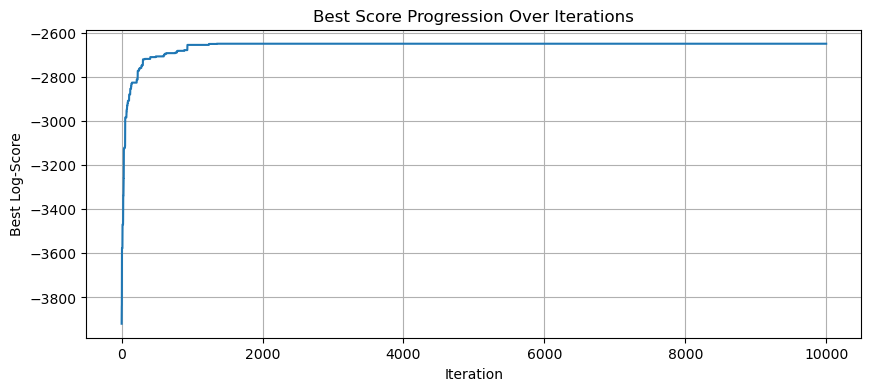

In [13]:
import matplotlib.pyplot as plt

# Plot score over iterations
plt.figure(figsize=(10, 4))
plt.plot(score_history)
plt.title('Best Score Progression Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Best Log-Score')
plt.grid(True)
plt.show()